In [163]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

%matplotlib inline

plt.style.use('seaborn')   

common_corruptions = ['gaussian_noise', 'shot_noise', 'impulse_noise', 'glass_blur',
                    'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
                    'elastic_transform', 'pixelate', 'jpeg_compression']

methods = ['noadapt', 'shot', 'con', 'totalalign', 'classalign']

common_corruptions.sort()




/tmp/ipykernel_38031/2386110417.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [164]:
def result_from_totalalign(corruption_type):
    root_dir = "/home2/wonjae.roh/tttplus/ttt-plus/cifar/results/final"
    file_dir = os.path.join(root_dir, 'Con+TotalAlign', f'cifar10_CON+TotalAlign_{corruption_type}', f'{corruption_type}_tttpp')
    try:
        result = np.loadtxt(file_dir, delimiter=',')
    except: 
        result = np.zeros((20,4))
    return result

def result_from_classalign(corruption_type):
    root_dir = "/home2/wonjae.roh/tttplus/ttt-plus/cifar/results/final"
    file_dir = os.path.join(root_dir, 'Con+ClassAlign', f'cifar10_CON+ClassAlign_PL_{corruption_type}', f'{corruption_type}_tttpp')
    try:
        result = np.loadtxt(file_dir, delimiter=',')
    except: 
        result = np.zeros((20,4))
    return result

def result_from_con(corruption_type):
    root_dir = "/home2/wonjae.roh/tttplus/ttt-plus/cifar/results/final"
    file_dir = os.path.join(root_dir, 'Con', f'cifar10_CON_{corruption_type}', f'{corruption_type}_ssl')
    try:
        result = np.loadtxt(file_dir, delimiter=',')
    except: 
        result = np.zeros((20,4))
    return result

def result_from_mu_only(corruption_type):
    root_dir = "/home2/wonjae.roh/tttplus/ttt-plus/cifar/results/final"
    file_dir = os.path.join(root_dir, 'mu_only', f'cifar10_mu_only_PL_{corruption_type}', f'{corruption_type}_tttpp')
    try:
        result = np.loadtxt(file_dir, delimiter=',')
    except: 
        result = np.zeros((20,4))
    return result

def result_from_sigma_only(corruption_type):
    root_dir = "/home2/wonjae.roh/tttplus/ttt-plus/cifar/results/final"
    file_dir = os.path.join(root_dir, 'sigma_only', f'cifar10_sigma_only_PL_{corruption_type}', f'{corruption_type}_tttpp')
    try:
        result = np.loadtxt(file_dir, delimiter=',')
    except: 
        result = np.zeros((20,4))
    return result

def bring_result(method, corruption_type):
    if method=='con':
        return result_from_con(corruption_type)
    elif method=='totalalign':
        return result_from_totalalign(corruption_type)
    elif method=='classalign':
        return result_from_classalign(corruption_type)
    elif method=='mu_only':
        return result_from_mu_only(corruption_type)
    elif method=='sigma_only':
        return result_from_sigma_only(corruption_type)
    else:
        raise(NotImplementedError)

In [165]:
cifartable = pd.DataFrame(np.zeros((5,12)), index=methods, columns=common_corruptions)

In [166]:
for method in ['con', 'totalalign', 'classalign']:
    for corruption_type in common_corruptions:
        cifartable.loc[method, corruption_type] = bring_result(method, corruption_type)[:,0].min()

cifartable.loc['noadapt'] = [0.2089, 0.2425, 0.2584, 0.5184, 0.4579, 0.5900, 0.1851, 0.2140, 0.4352, 0.4633, 0.1833, 0.0967]
cifartable.loc['shot'] = [0.1893, 0.1888, 0.1315, 0.1642, 0.2474, 0.2627, 0.1355, 0.1339, 0.1123, 0.1538, 0.1555, 0.0774]


In [167]:
cifartable

,elastic_transform,fog,frost,gaussian_noise,glass_blur,impulse_noise,jpeg_compression,motion_blur,pixelate,shot_noise,snow,zoom_blur
noadapt,0.2089,0.2425,0.2584,0.5184,0.4579,0.5900,0.1851,0.2140,0.4352,0.4633,0.1833,0.0967
shot,0.1893,0.1888,0.1315,0.1642,0.2474,0.2627,0.1355,0.1339,0.1123,0.1538,0.1555,0.0774
con,0.1688,0.1058,0.1264,0.1669,0.2353,0.1878,0.1372,0.1153,0.1188,0.1509,0.1260,0.0834
totalalign,0.1674,0.1036,0.1151,0.1677,0.2093,0.1810,0.1308,0.1145,0.1101,0.1492,0.1162,0.0825
classalign,0.1637,0.1105,0.1132,0.1527,0.2082,0.1963,0.1252,0.1093,0.1039,0.1412,0.1113,0.0732


In [168]:
cifartable_percentage=cifartable*100
cifartable_percentage

,elastic_transform,fog,frost,gaussian_noise,glass_blur,impulse_noise,jpeg_compression,motion_blur,pixelate,shot_noise,snow,zoom_blur
noadapt,20.89,24.25,25.84,51.84,45.79,59.00,18.51,21.40,43.52,46.33,18.33,9.67
shot,18.93,18.88,13.15,16.42,24.74,26.27,13.55,13.39,11.23,15.38,15.55,7.74
con,16.88,10.58,12.64,16.69,23.53,18.78,13.72,11.53,11.88,15.09,12.60,8.34
totalalign,16.74,10.36,11.51,16.77,20.93,18.10,13.08,11.45,11.01,14.92,11.62,8.25
classalign,16.37,11.05,11.32,15.27,20.82,19.63,12.52,10.93,10.39,14.12,11.13,7.32


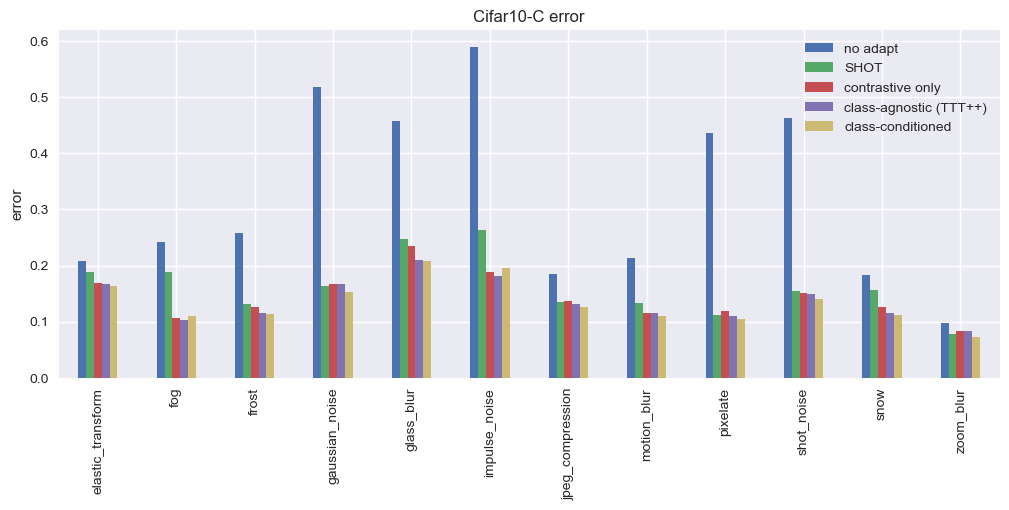

In [169]:
cifartable.T.plot.bar(figsize=(10, 5))
plt.tight_layout()
plt.ylabel("error")
plt.title("Cifar10-C error")
plt.legend(["no adapt", "SHOT", "contrastive only", "class-agnostic (TTT++)", "class-conditioned"])
plt.show()

/tmp/ipykernel_38031/3137207198.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


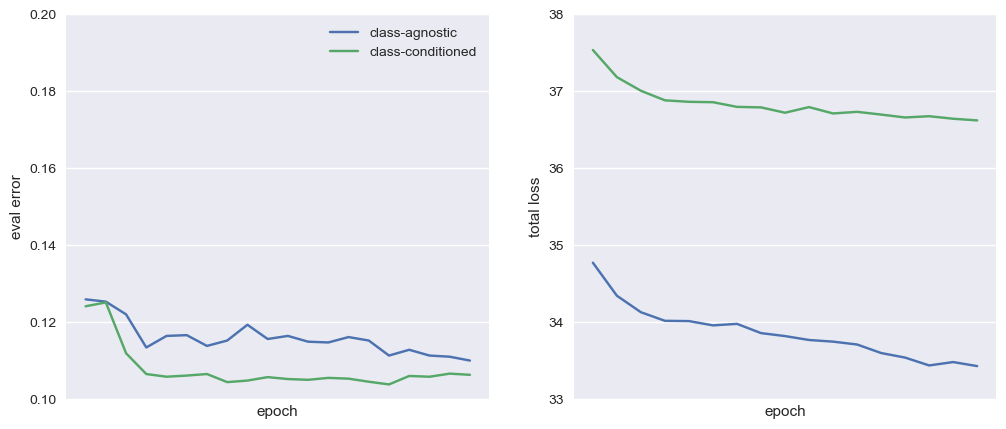

In [170]:
def plot_loss(corruption):

    plt.subplot(1,2,2)
    totalalign_result = bring_result("totalalign", corruption)
    classalign_result = bring_result("classalign", corruption)
    plt.plot(totalalign_result[3:,1]+totalalign_result[3:,2]+totalalign_result[3:,3])
    plt.plot(classalign_result[3:,1]+classalign_result[3:,2]+classalign_result[3:,3])
    plt.ylim([33,38])
    plt.xlabel("epoch")
    plt.ylabel("total loss")
    plt.xticks([], [])

    plt.subplot(1,2,1)
    plt.plot(totalalign_result[:,0])
    plt.plot(classalign_result[:,0])
    plt.ylim([0.1,0.2])
    plt.xlabel("epoch")
    plt.ylabel("eval error")
    plt.xticks([], [])
    plt.legend(["class-agnostic", "class-conditioned"])

corruption = "pixelate"

plt.figure(3, figsize=[12,5])
plt.title(corruption)
plot_loss(corruption)